In [1]:
%matplotlib notebook
import os
import os.path as path
import numpy as np
import matplotlib.pyplot as plt

# Local module and scripts
from pyccapt.calibration.calibration_tools import data_tools, variables
from pyccapt.calibration.calibration_tools import reconstruction

# The initial value for flight path length, which is the distance of local electrod to detector 
flightPathLength = 110 # mm 
# The initial value for t_0
t0 = 51.74 # ns
variables.init()



In [2]:
number_sample = 300
save_fig=False
plot_fig=True 

$$\textbf{You can specify which dataset to use in below block}$$

In [3]:
variables.init()

tdc_model = 'surface_concept' # TDC model: surface_concept or roentdec

# dataset name
# dataset_name = 'AL_data_b'
dataset_name = 'OLO_AL_6_data'
# dataset_name = 'OLO_W_6_data'
# dataset_name = 'OLO_Ni_8_data'
# dataset_name = 'X6Cr17_2V30Min_5_data'
# dataset_name = "data_1029_Jun-27-2022_15-53_Pd"


p = path.abspath(path.join("", "../../../../.."))

path_main = os.path.join(p, 'tests//data')
filename_main = path_main + '//' + dataset_name + '.h5'

variables.path = os.path.join(p, 'tests//results//load_crop')
variables.result_path = os.path.join(p, 'tests/results/tof_calibratin/' + dataset_name)
if not os.path.isdir(variables.result_path):
        os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
        
filename = variables.path + '//' + dataset_name + '//' + dataset_name + '_cropped' + '.h5'



head, tail = os.path.split(filename)
figname = os.path.splitext(tail)[0]

data = data_tools.read_hdf5_through_pandas(filename)


dld_highVoltage = data['dld/high_voltage'].to_numpy()
dld_pulseVoltage = data['dld/pulse_voltage'].to_numpy()
dld_t = data['dld/t'].to_numpy()
dld_x = data['dld/x'].to_numpy()
dld_y = data['dld/y'].to_numpy()

In [4]:
data

,dld/high_voltage,dld/pulse_voltage,dld/start_counter,dld/t,dld/x,dld/y
0,5267.498047,5267.498047,55251.0,622.754406,3.279184,4.170612
1,5267.498047,5267.498047,55287.0,638.987292,21.203265,-21.457959
2,5267.498047,5267.498047,55309.0,623.385342,5.953469,6.813061
3,5267.498047,5267.498047,56063.0,628.576848,17.955918,-11.620408
4,5267.498047,5267.498047,56440.0,634.749048,-21.903673,0.159184
...,...,...,...,...,...,...
1882844,5712.204590,5712.204590,43305.0,601.762068,2.069388,-6.335510
1882845,5712.204590,5712.204590,43628.0,621.602262,29.130612,16.937143
1882846,5712.204590,5712.204590,44204.0,604.141794,6.240000,-5.762449
1882847,5712.204590,5712.204590,44353.0,602.152974,1.146122,6.685714


In [5]:
x, y, z = reconstruction.atom_probe_recons_from_detector(dld_x, dld_y, dld_highVoltage, 110, kf=3.0, det_eff=50, icf=1.4, Fevap=65, avgDens=60.2)

<IPython.core.display.Javascript object>


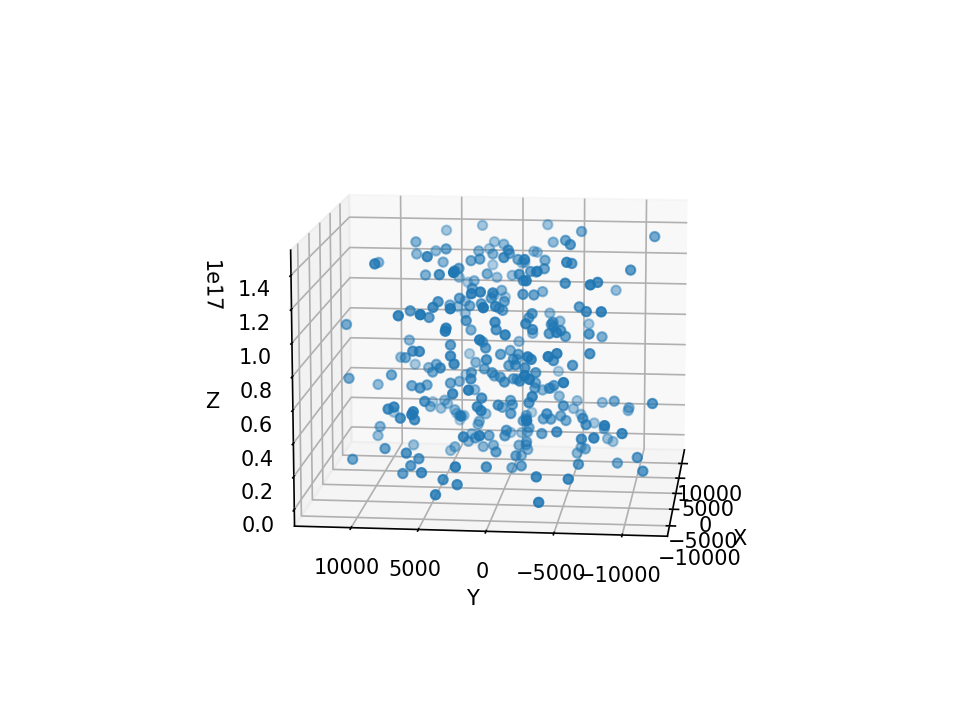

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

mask = np.random.randint(0, len(z), 300)
ax.scatter(x[mask], y[mask], z[mask])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()